In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
plt.rcParams['font.size'] = 15

In [2]:
import numpy as np
def draw_table(col_labels, row_labels, table_vals, line=None):
    if not line is None:
        line = np.array(line)
        line = line.transpose()

    ncol = len(col_labels)
    nrow = len(row_labels)

    # draw grid lines
    plt.plot(np.tile([0, ncol+1], (nrow+2,1)).T, np.tile(np.arange(nrow+2), (2,1)),
        'k', linewidth=3)
    plt.plot(np.tile(np.arange(ncol+2), (2,1)), np.tile([0, nrow+1], (ncol+2,1)).T,
        'k', linewidth=3)

    # plot labels
    for icol, col in enumerate(col_labels):
        plt.text(icol + 1.5, nrow + 0.5, col, ha='center', va='center')
    for irow, row in enumerate(row_labels):
        plt.text(0.5, nrow - irow - 0.5, row, ha='center', va='center')

    # plot table content
    for irow, row in enumerate(table_vals):
        for icol, cell in enumerate(row):
            plt.text(icol + 1.5, nrow - irow - 0.5, cell, ha='center', va='center')

    # plot line
    if not line is None:
        plt.plot(line[0] + 1.5, nrow - line[1] - 0.5, 'r', linewidth = 5, alpha = 0.5)

    #plt.axis([-0.5, ncol + 1.5, -0.5, nrow+1.5])
    plt.axis('off')
    plt.show()

def format_matrix(mat):
    n, m = mat.shape
    return [[f'{mat[i][j]:.2f}' for j in range(m)] for i in range(n)]

In [56]:
blocks_map = [
    '........',
    '.....#..',
    '.....#..',
    '.......#',
    '..#.....',
]
n = len(blocks_map)
m = len(blocks_map[0])
cols = [str(i) for i in range(m)]
rows = [str(i) for i in range(n)]

In [57]:
prob = np.zeros((n, m))
prob[0][0] = 1.0

for i in range(n):
    for j in range(m):
        if i < n - 1 and j < m - 1:
            prob[i + 1][j] += 0.5 * prob[i][j]
            prob[i][j + 1] += 0.5 * prob[i][j]
        elif i < n - 1:
            prob[i + 1][j] += prob[i][j]
        elif j < m - 1:
            prob[i][j + 1] += prob[i][j]
print (prob[n - 1][m - 1])

1.0


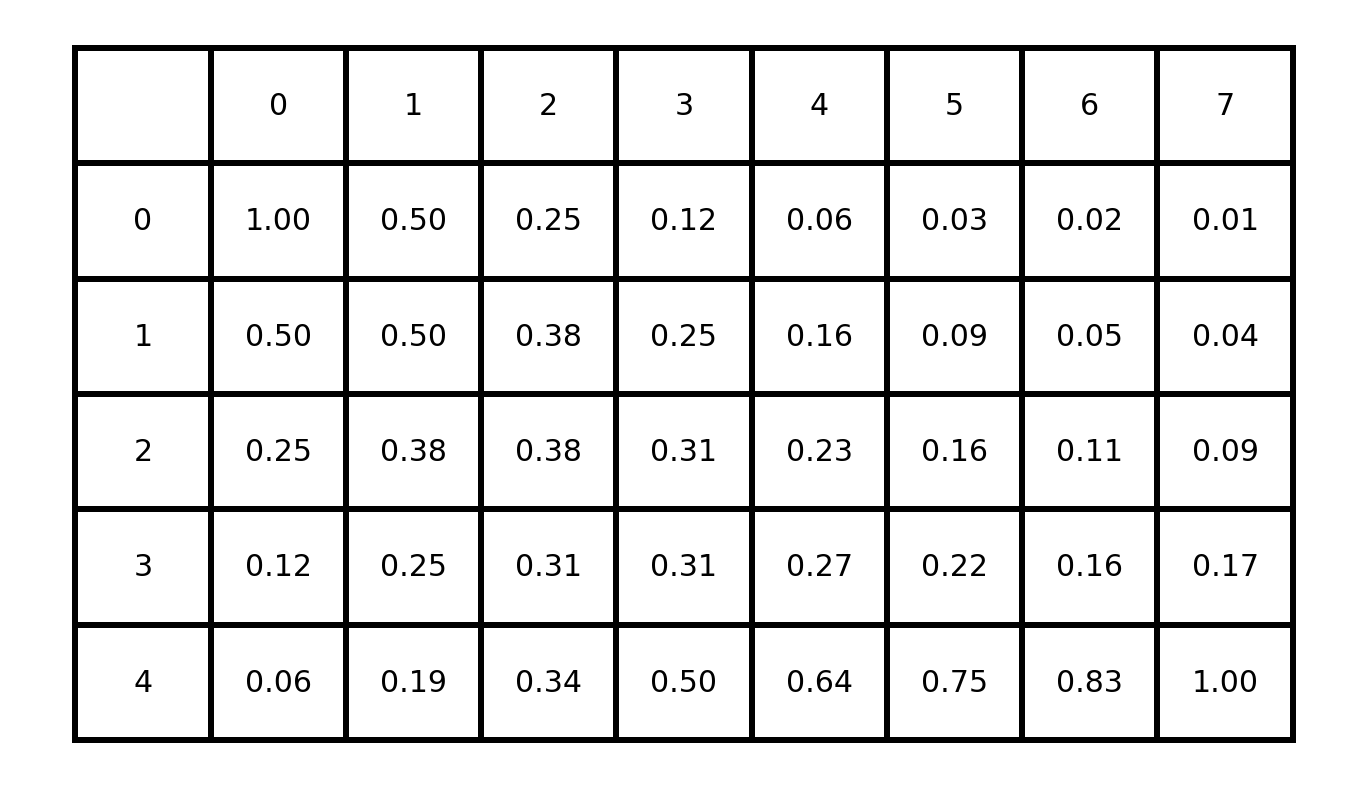

In [58]:
draw_table(cols, rows, format_matrix(prob))

In [9]:
prob = np.zeros((n, m))
prob[0][0] = 1.0

for i in range(n):
    for j in range(m):
        can_go_up = (i < n - 1) and blocks_map[i + 1][j] == '.'
        can_go_right = (j < m - 1) and blocks_map[i][j + 1] == '.'

        if can_go_up and can_go_right:
            prob[i + 1][j] += 0.5 * prob[i][j]
            prob[i][j + 1] += 0.5 * prob[i][j]
        elif can_go_up:
            prob[i + 1][j] += prob[i][j]
        elif can_go_right:
            prob[i][j + 1] += prob[i][j]
print (prob[n - 1][m - 1])

0.78515625


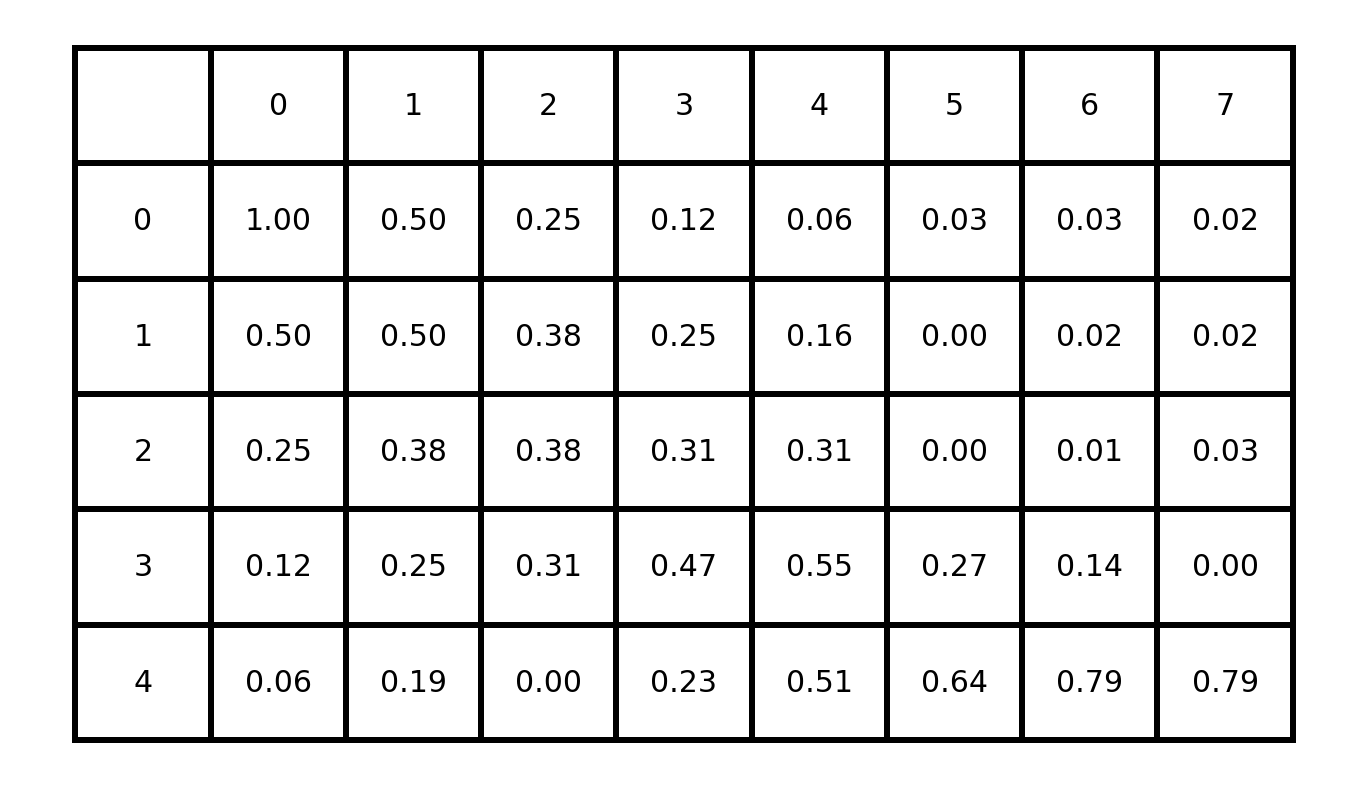

In [10]:
draw_table(cols, rows, format_matrix(prob))

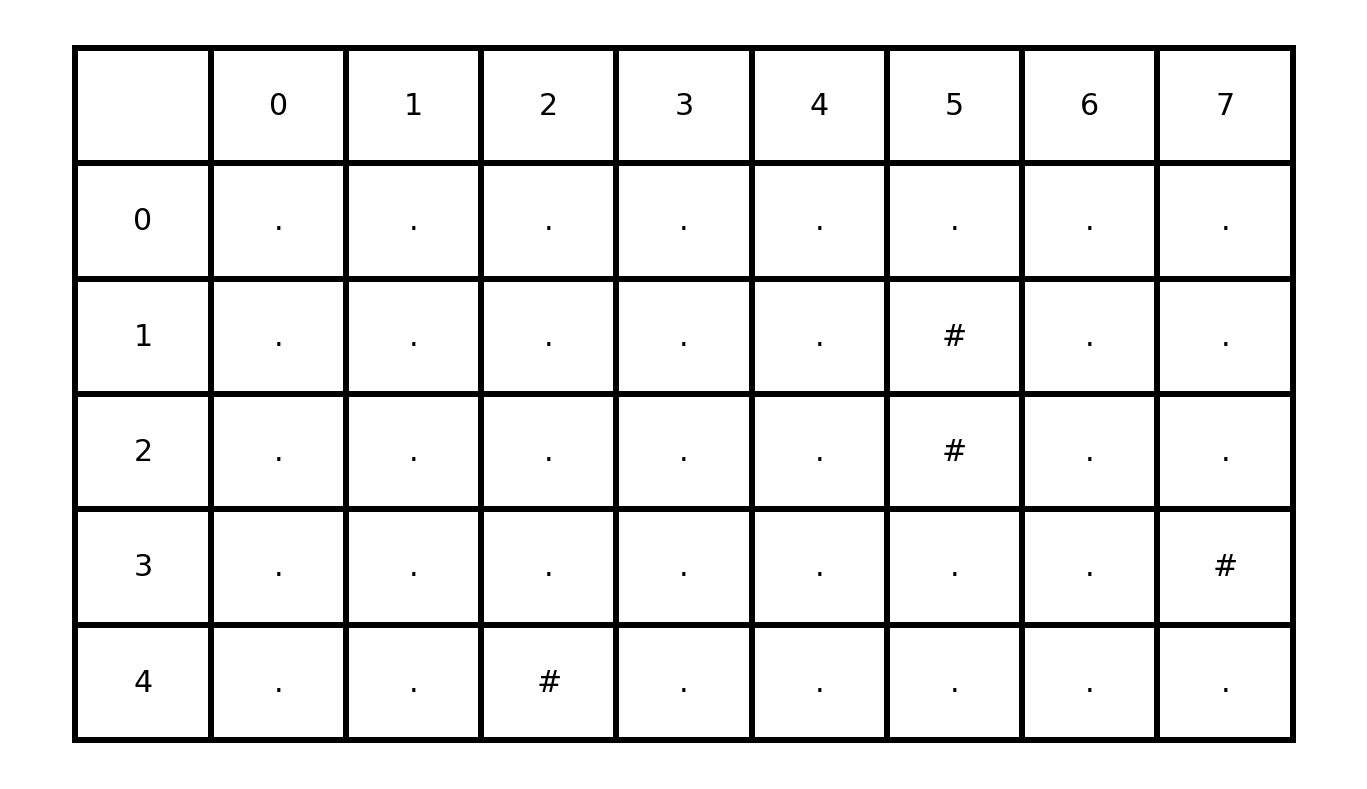

In [11]:
draw_table(cols, rows, blocks_map)

In [75]:
features = [
    '......B.',
    '.....B..',
    '....B...',
    'A..B..CC',
    '...C....',
]
n = len(features)
m = len(features[0])
cols = [str(i) for i in range(m)]
rows = [str(i) for i in range(n)]

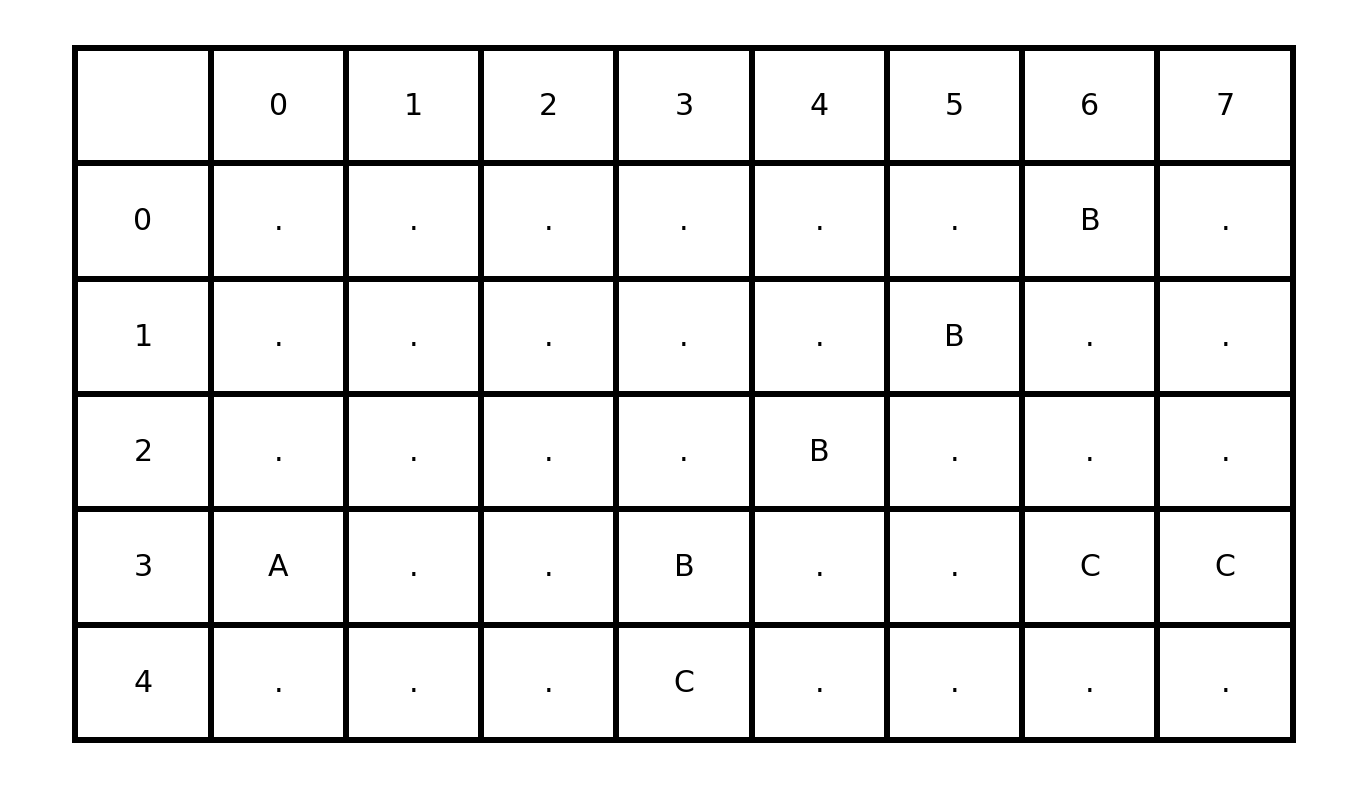

In [76]:
draw_table(cols, rows, features)

In [77]:
prob = [[dict() for j in range(m)] for i in range(n)]
prob[0][0]['' if features[0][0] == '.' else features[0][0]] = 1.0

for i in range(n):
    for j in range(m):
        can_go_up = (i < n - 1)
        can_go_right = (j < m - 1)
        for key in prob[i][j]:
            if can_go_up:
                up_str = key + ('' if features[i + 1][j] == '.' else features[i + 1][j])
                if up_str not in prob[i + 1][j]:
                    prob[i + 1][j][up_str] = 0.0
            if can_go_right:
                right_str = key + ('' if features[i][j + 1] == '.' else features[i][j + 1])
                if right_str not in prob[i][j + 1]:
                    prob[i][j + 1][right_str] = 0.0

            if can_go_up and can_go_right:
                prob[i + 1][j][up_str] += 0.5 * prob[i][j][key]
                prob[i][j + 1][right_str] += 0.5 * prob[i][j][key]
            elif can_go_up:
                prob[i + 1][j][up_str] += prob[i][j][key]
            elif can_go_right:
                prob[i][j + 1][right_str] += prob[i][j][key]
print (prob[n - 1][m - 1])
print (max([(value, key) for key, value in prob[n - 1][m - 1].items()]))

{'BC': 0.3193359375, 'BCC': 0.0810546875, 'ABCC': 0.0009765625, 'ABC': 0.0087890625, 'B': 0.240234375, 'AB': 0.005859375, 'C': 0.234375, 'AC': 0.109375}
(0.3193359375, 'BC')


In [55]:
print(prob[4][3])
print(sum([value for key, value in prob[4][3].items()]))

{'ABBBC': 0.0078125, 'BBBC': 0.0234375, 'BBC': 0.046875, 'BC': 0.078125, 'C': 0.34375}
0.5
